In [1]:
# Custom imports
#from TFile_Extravaganza.analysis_scripts import graph_scint_values
from TFile_Extravaganza.analysis_scripts import graph_scint_values

# Other
from ROOT import TFile, TProfile, TCanvas, TH1D, TH2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import math

Welcome to JupyROOT 6.22/08


### Check functions in ``analysis_scripts.py``
- Entire workflow
- Bad event rejection, in particular


In [2]:
graph_scint_values(1571931443)

QDC0_ch0<3815.1942570938736 && QDC0_ch0>2217.684324270297
 FCN=615.886 FROM MIGRAD    STATUS=CONVERGED     123 CALLS         124 TOTAL
                     EDM=1.95197e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.63348e+04   1.30085e+02   1.09019e+00  -7.94084e-07
   2  MPV          3.01644e+03   1.13862e+00   1.04744e-02   5.05473e-04
   3  Sigma        1.50115e+02   7.54069e-01   8.65229e-06  -7.27813e-01


In [6]:
import ROOT
ROOT.Double(3)

AttributeError: Failed to get attribute Double from ROOT

QDC0_ch0<3815.1942570938736 && QDC0_ch0>2217.684324270297


(<cppyy.gbl.TCanvas object at 0x1da39970>,
 <cppyy.gbl.TF1 object at 0x1ad0ad20>)

 FCN=615.886 FROM MIGRAD    STATUS=CONVERGED     123 CALLS         124 TOTAL
                     EDM=1.95197e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.63348e+04   1.30085e+02   1.09019e+00  -7.94084e-07
   2  MPV          3.01644e+03   1.13862e+00   1.04744e-02   5.05473e-04
   3  Sigma        1.50115e+02   7.54069e-01   8.65229e-06  -7.27813e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


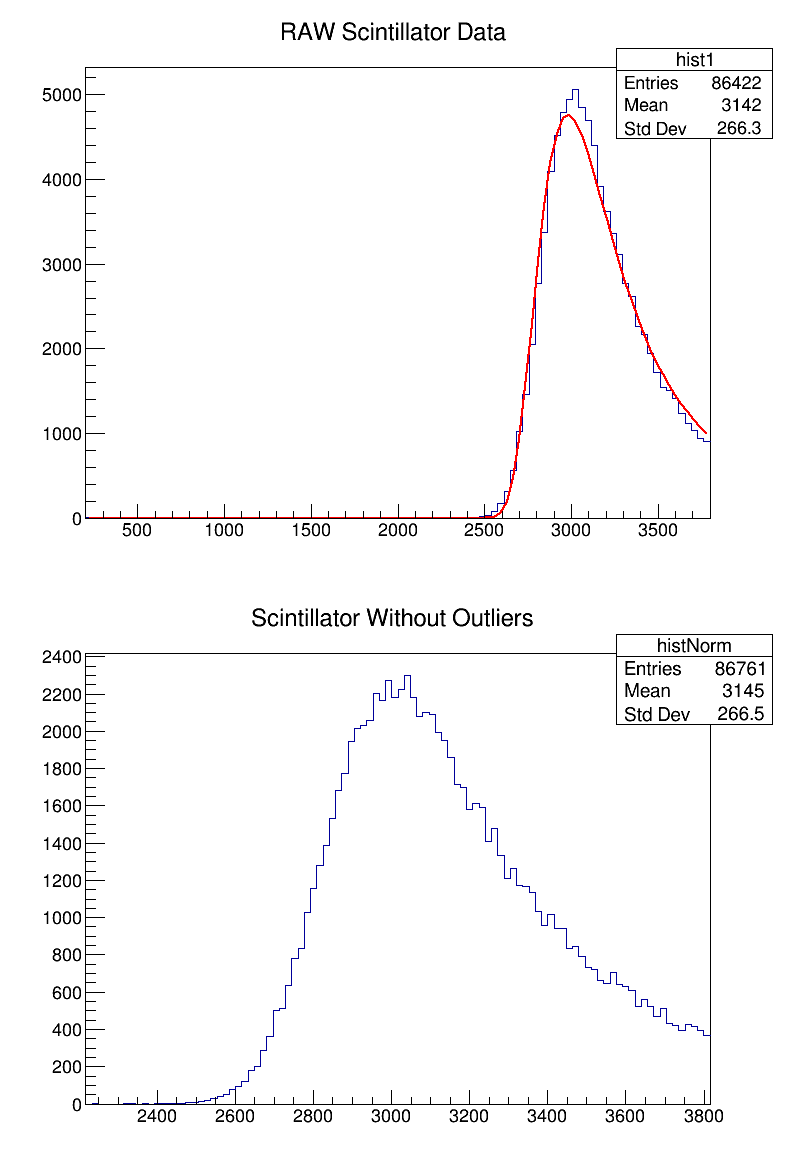

In [44]:
from ROOT import TFile, TProfile, TCanvas, TH1D, TH2D, TF1
runNumber = 1571931443
def drawStuff(runNumber):
    fitti = TF1('fitti', 'landau')

    #get a TTree from the run that we are passing in
    runName = f"/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/{runNumber}.root"
    importFile = TFile(runName, "READ")
    #RECOdata = importFile.Get("RECOdata")
    RAWdata = importFile.Get("RAWdata")
    #maybe this code: TTree = TFile.Get("RECOData")

    #draw the hist of the run with landau dist
    #do we want this to graph onto one canvas? make a new canvas?
    #for now I just did one canvas bc we're passing in one run at a time

    c = TCanvas('c', 'c', 800, 1200)
    c.Divide(1,2)
    c.cd(1) # what does this code do?
    hist1 = TH1D("hist1", "RAW Scintillator Data", 100, 200, 3800)

    #graph without cutoffs
    # RECOdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    RAWdata.Draw("QDC0_ch0>>hist1", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)
    #c.Draw()

    #return the fitti mean (we can change this for the histogram mean)
    fittiMean = fitti.GetParameter("MPV")
    stdDev = hist1.GetStdDev()
    lowerBound = fittiMean - 3 * stdDev
    upperBound = fittiMean + 3 * stdDev
    #scaleMean = kDict[wowmagicindex]*fittiMean
    scaleMean = 4.16278486487498*fittiMean
    #todo: make each run correspond to some voltage and thickness


    #slice the sigma
    #graph again
    c.cd(2)
    histNorm = TH1D("histNorm", "Scintillator Without Outliers", 100, lowerBound, upperBound)
    # RECOdata.Draw("QDC0_ch0>>name", "QDC0_ch0<upperBound && QDC0_ch0>lowerBound")
    cutoffs = f"QDC0_ch0<{upperBound} && QDC0_ch0>{lowerBound}"
    print(cutoffs)
    RAWdata.Draw("QDC0_ch0>>histNorm", cutoffs)
    # RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    # histNorm.Draw() 
    c.Draw()
    # fitti return not nec. 
    return c, RAWdata, hist1, histNorm, importFile, fitti
drawStuff(runNumber)